<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from voidlemming.voigtselector import VoigtFitter
from voidlemming import spechelpers as sh
%matplotlib notebook

In [2]:
galaxy = 'haro11'
file = '/home/axel/PhD/LARS/larsData/raw/UVspectra/Haro11/knotA.coarse.ascii'
redshift = 0.02059

<IPython.core.display.Javascript object>


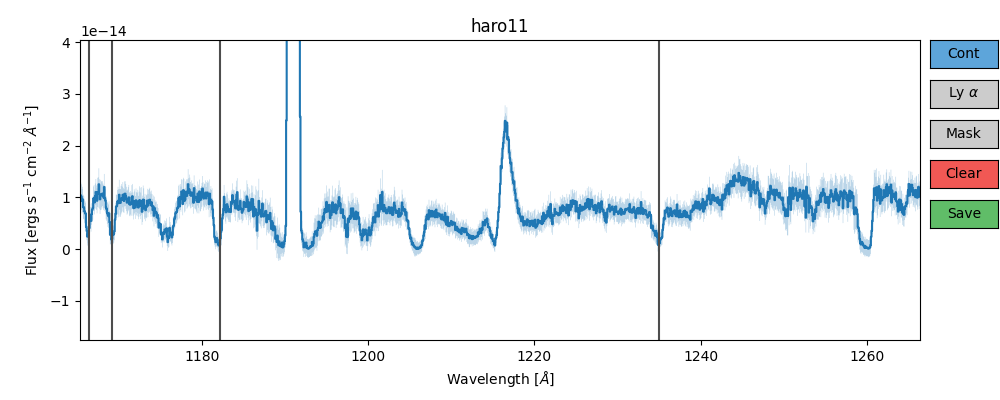

In [3]:
vFitter = VoigtFitter(file, galaxy, width=25000, varyCenter=False, redshift=redshift, velocity=0, show_ism_lines=True)

In [4]:
# Print Results
print('\033[1m'+'logN:  '+'\033[0m', vFitter.bestFitParams['logN'].value, '±', vFitter.bestFitParams['logN'].stderr)
print('\033[1m'+'b:     '+'\033[0m', vFitter.bestFitParams['b'].value, '±', vFitter.bestFitParams['b'].stderr)
print('\033[1m'+'Center:'+'\033[0m', vFitter.bestFitParams['wrest'].value, '±', vFitter.bestFitParams['wrest'].stderr)



center_kms = sh.dwl2v(vFitter.bestFitParams['wrest'].value - 1215.67, 1215.67)
center_err = sh.dwl2v(vFitter.bestFitParams['wrest'].stderr, 1215.67)
print('\033[1m'+'Center [km/s]:'+'\033[0m', center_kms, '±', center_err)
print('\033[1m'+'EW:           '+'\033[0m', vFitter.vEW[0])
print('')
print('--------------------------------')
print('vint for reference', vFitter.vint)

logN:   20.582927405009084 ± 0.032816820635058315
b:      0.015830954949028198 ± 305594.75577755494
Center: 1215.67 ± 0
Center [km/s]: 0.0 ± 0.0
EW:            13.658183384342326

--------------------------------
vint for reference 0


In [5]:
vFitter.export_fit('test.dat')